#  `region_surface_areas`

Calculates the surface area of each region in a labeled image. This method works by applying `mesh_region` on each region and calling `mesh_surface_area` method for each labeled region in the image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
from skimage.morphology import disk
import inspect
inspect.signature(ps.metrics.region_surface_areas)

<Signature (regions, voxel_size=1, strel=None)>

## `regions`
The input image of the pore space partitioned into individual pore regions. Note that zeros in the image (solid phase) will not be considered for area calculation.

0it [00:00, ?it/s]

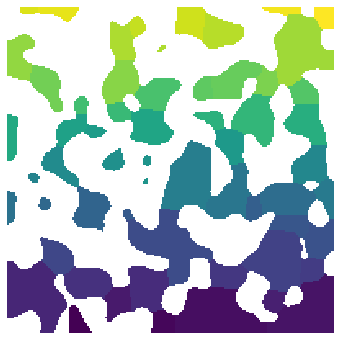

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[200,200])
snow = ps.filters.snow_partitioning(im)
regions = snow.regions
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(regions/im, origin='lower', interpolation='none')
ax.axis(False);

The `region_surface_areas` returns a list containing the surface area of each region, offset by 1, such that the surface area of region 1 is stored in element 0 of the list. We can visualize each region's surface area by assigning the returned values to each region:

Computing region surface area                               :   0%|          | 0/57 [00:00<?, ?it/s]

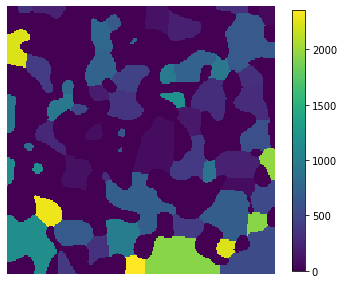

In [3]:
surface_areas = ps.metrics.region_surface_areas(regions=regions)
regions_sur = np.copy(regions)
for i in range(0, len(surface_areas)):
    mask = np.array(np.where(regions_sur == i, regions_sur, 0), dtype=bool)
    regions_sur[mask] = surface_areas[i]
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
plt.imshow(regions_sur, origin='lower', interpolation='none')
cbar = plt.colorbar(ax=ax, shrink=0.8)
ax.axis(False);

## `voxel_size`

By default the voxel_size is 1. We can assign voxel size of the image as the input or apply the scaling on the results after the fact. Let's plot the histogram of regions surface areas of an image with a given voxel_size:

Computing region surface area                               :   0%|          | 0/57 [00:00<?, ?it/s]

Computing region surface area                               :   0%|          | 0/57 [00:00<?, ?it/s]

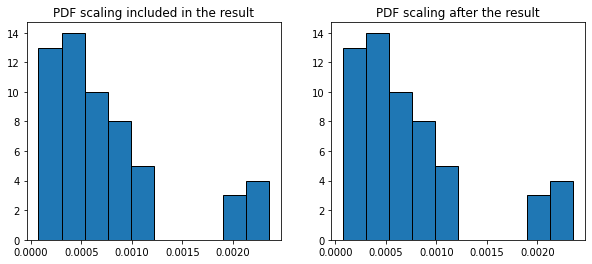

In [4]:
voxel_size=1e-3
surface_areas = ps.metrics.region_surface_areas(regions=regions, voxel_size=voxel_size)
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
ax[0].hist(surface_areas, edgecolor='k');
ax[0].set_title("PDF scaling included in the result");
surface_areas = ps.metrics.region_surface_areas(regions=regions)
ax[1].hist(surface_areas*voxel_size**2, edgecolor='k');
ax[1].set_title("PDF scaling after the result");

## `strel`

By default the structuring element used to blur the region is a spherical element (or disk) with radius 1. This structuring element is used in the `mesh_region` method, which is called within the `region_surface_areas` function. The blur is
perfomed using a simple convolution filter. The point is to create a greyscale region to allow the marching cubes algorithm (meshing algorithm) some freedom to conform the mesh to the surface.  As the size of ``strel`` increases the region will become increasingly blurred and inaccurate.

Computing region surface area                               :   0%|          | 0/57 [00:00<?, ?it/s]

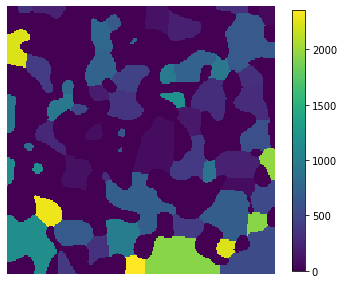

In [5]:
surface_areas = ps.metrics.region_surface_areas(regions=regions, strel=disk(10))
regions_sur = np.copy(regions)
for i in range(0, len(surface_areas)):
    mask = np.array(np.where(regions_sur == i, regions_sur, 0), dtype=bool)
    regions_sur[mask] = surface_areas[i]
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
plt.imshow(regions_sur, origin='lower', interpolation='none')
cbar = plt.colorbar(ax=ax, shrink=0.8)
ax.axis(False);